### Import Required Libraries

```python```

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

#### Dataset

In [2]:
df= pd.read_csv('./TVaritDoc.csv')

In [3]:
print(df.head(), "\n\n", "Shape:",df.shape)

                   timestamp           part_id  temperature_1  temperature_2  \
0  2024-02-15 05:44:34+05:30  2124077390649042          439.1          424.1   
1  2024-02-15 05:44:35+05:30  2124077390649042          438.9          423.9   
2  2024-02-15 05:44:36+05:30  2124077390649042          438.7          423.6   
3  2024-02-15 05:44:37+05:30  2124077390649042          438.4          423.4   
4  2024-02-15 05:44:38+05:30  2124077390649042          438.2          423.2   

   temperature_3  temperature_4  label  
0          536.0          518.6      0  
1          535.9          518.7      0  
2          535.6          518.9      0  
3          535.4          519.0      0  
4          535.2          519.2      0   

 Shape: (100000, 7)


In [4]:
df.columns

Index(['timestamp', 'part_id', 'temperature_1', 'temperature_2',
       'temperature_3', 'temperature_4', 'label'],
      dtype='object')

In [5]:
print("Checking for missing values", df.isnull().sum(), "\n\n")

print("Unique values in the label column: ", df.label.unique(), "\n\n")\

print("Number of different part ids: ", df.part_id.nunique(), "\n\n")

Checking for missing values timestamp        0
part_id          0
temperature_1    0
temperature_2    0
temperature_3    0
temperature_4    0
label            0
dtype: int64 


Unique values in the label column:  [0 1] 


Number of different part ids:  295 




<Axes: xlabel='timestamp'>

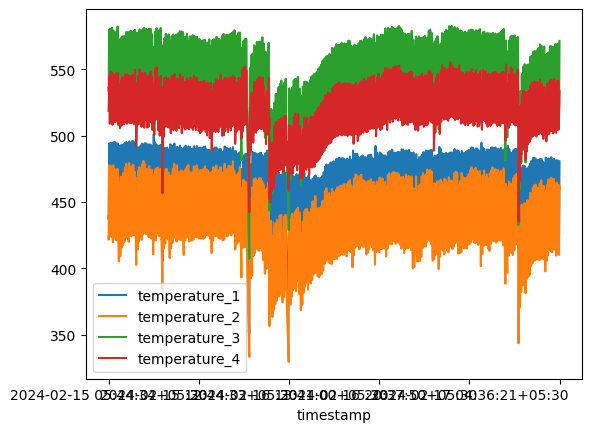

In [6]:
df.plot(x='timestamp', y=['temperature_1', 'temperature_2', 'temperature_3', 'temperature_4'])

#### Aggregate the data by part_id column to generate features

In [ ]:
grouped_df = df.groupby('part_id').agg({
    'temperature_1': ['std', 'max', 'min'],
    'temperature_2': ['std', 'max', 'min'],
    'temperature_3': ['std', 'max', 'min'],
    'temperature_4': ['std', 'max', 'min'],
    'label': 'first'  # Retain the label information
})

# Flatten the MultiIndex columns
grouped_df.columns = ['_'.join(col) for col in grouped_df.columns]

# Reset index if you want part_id to be a column
grouped_df = grouped_df.reset_index()
grouped_df.drop(columns=['part_id'], inplace=True)

# print(grouped_df)

#### Violin Plot

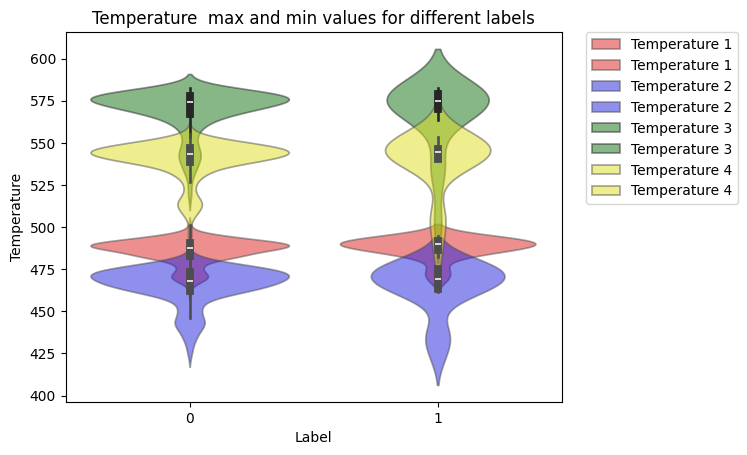

In [80]:
plot= sns.violinplot(x='label_first', y='temperature_1_max', data=grouped_df, alpha=0.5, legend=True, color='red', label='Temperature 1')

sns.violinplot(x='label_first', y='temperature_2_max', data=grouped_df, alpha=0.5, legend=True, color='blue', label='Temperature 2', ax=plot)

sns.violinplot(x='label_first', y='temperature_3_max', data=grouped_df, alpha=0.5, legend=True, color='green', label='Temperature 3', ax=plot)

sns.violinplot(x='label_first', y='temperature_4_max', data=grouped_df, alpha=0.5, legend=True, color='yellow', label='Temperature 4', ax=plot)

plot.set_title('Temperature  max and min values for different labels')
plot.set_ylabel('Temperature')
plot.set_xlabel('Label')
plot.legend(bbox_to_anchor=(1.05, 1),  borderaxespad=0.)


#### Box Plot

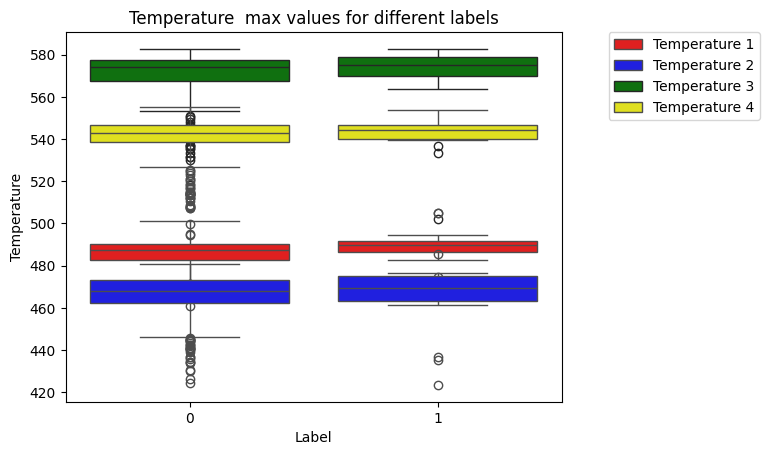

In [82]:
box_plot= sns.boxplot(x='label_first', y='temperature_1_max', data=grouped_df,  legend=True, color='red', label='Temperature 1')
sns.boxplot(x='label_first', y='temperature_2_max', data=grouped_df, legend=True, ax=box_plot, color='blue', label='Temperature 2')
sns.boxplot(x='label_first', y='temperature_3_max', data=grouped_df, legend=True, ax=box_plot, color='green', label='Temperature 3')
sns.boxplot(x='label_first', y='temperature_4_max', data=grouped_df, legend=True, ax=box_plot, color='yellow', label='Temperature 4')

box_plot.set_title('Temperature  max values for different labels')
box_plot.set_ylabel('Temperature')
box_plot.set_xlabel('Label')
box_plot.legend(loc='upper right', bbox_to_anchor=(1.4, 1), borderaxespad=0.)


#### Prepare dataset for training

In [88]:
data = tf.data.Dataset.from_tensor_slices((grouped_df.drop(columns=['label_first']).values, grouped_df['label_first'].values))



(array([[ 17.91336935, 492.1       , 436.        ,  17.37399214,
         477.        , 421.7       ,  16.07196508, 575.4       ,
         529.1       ,  11.89931865, 545.1       , 507.6       ],
        [ 20.46808645, 474.5       , 412.4       ,  18.95444141,
         423.5       , 356.6       ,  18.41418541, 501.9       ,
         443.7       ,  11.42911539, 485.4       , 449.7       ],
        [ 17.84335712, 483.3       , 426.9       ,  16.93271642,
         461.1       , 409.3       ,  15.33965089, 568.2       ,
         522.7       ,  12.26975348, 540.4       , 501.5       ],
        [ 17.47496438, 487.3       , 432.8       ,  17.14038766,
         469.4       , 417.6       ,  16.82076675, 575.1       ,
         525.        ,  12.0943691 , 545.6       , 508.3       ],
        [ 17.19308064, 470.5       , 405.3       ,  18.77724491,
         424.3       , 363.5       ,  19.81051915, 518.4       ,
         456.7       ,  11.18772929, 494.4       , 460.7       ],
        [ 18.1392626

data

In [26]:
normal_parts_df = df[df['label'] == 0]
normal_parts_unique = normal_parts_df['part_id'].unique()
for part_id in normal_parts_unique[:3]:
    part_df = normal_parts_df[normal_parts_df['part_id'] == part_id]
    part_df.plot( y=['temperature_1', 'temperature_2', 'temperature_3', 'temperature_4'])

,timestamp,part_id,temperature_1,temperature_2,temperature_3,temperature_4,label
0,2024-02-15 05:44:34+05:30,2124077390649042,439.1,424.1,536.0,518.6,0
1,2024-02-15 05:44:35+05:30,2124077390649042,438.9,423.9,535.9,518.7,0
2,2024-02-15 05:44:36+05:30,2124077390649042,438.7,423.6,535.6,518.9,0
3,2024-02-15 05:44:37+05:30,2124077390649042,438.4,423.4,535.4,519.0,0
4,2024-02-15 05:44:38+05:30,2124077390649042,438.2,423.2,535.2,519.2,0


In [29]:
faulty_parts_df = df[df['label']==1]
faulty_parts_df.head()

,timestamp,part_id,temperature_1,temperature_2,temperature_3,temperature_4,label
4752,2024-02-15 07:19:18+05:30,2124077393609042,441.1,428.1,532.9,517.0,1
4753,2024-02-15 07:19:19+05:30,2124077393609042,440.9,427.9,532.7,517.2,1
4754,2024-02-15 07:19:20+05:30,2124077393609042,440.7,427.7,532.6,517.3,1
4755,2024-02-15 07:19:21+05:30,2124077393609042,440.5,427.4,532.3,517.4,1
4756,2024-02-15 07:19:22+05:30,2124077393609042,440.3,427.1,532.1,517.6,1
